# Heart Disease Analysis: Introduction

This analysis explores a publicly available dataset to identify key predictors of heart disease. By examining variables such as age, gender, chest pain type, and cholesterol levels, the project aims to:
1. Identify the most significant predictors of heart disease.
2. Explore patterns and anomalies in the dataset.
3. Provide actionable insights for healthcare professionals and researchers.

### Dataset Overview
- **Target Variable**: `target` (1 = Heart Disease, 0 = No Heart Disease)
- **Key Predictors**: `cp` (Chest Pain Type), `chol` (Cholesterol), `thalach` (Maximum Heart Rate), and more.
- **Purpose**: Inform prevention strategies and improve diagnostic processes.


In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Ja\Documents\PythonPrograms\Portfolio_projects\Heart_Disease_Analysis\data\data.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

df = df.drop_duplicates()

print(f"Shape of dataset after removing duplicates: {df.shape}")

Number of duplicate rows: 723
Shape of dataset after removing duplicates: (302, 14)


Legend:
age: Age of the person
sex: Gender (1 = male, 0 = female)
cp: Chest pain type (0-3)
trestbps: Resting blood pressure (in mm Hg)
chol: Serum cholesterol (in mg/dl)
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0-2)
thalach: Maximum heart rate achieved
exang: Exercise-induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: Slope of the peak exercise ST segment (0-2)
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
target: Presence of heart disease (1 = yes; 0 = no)


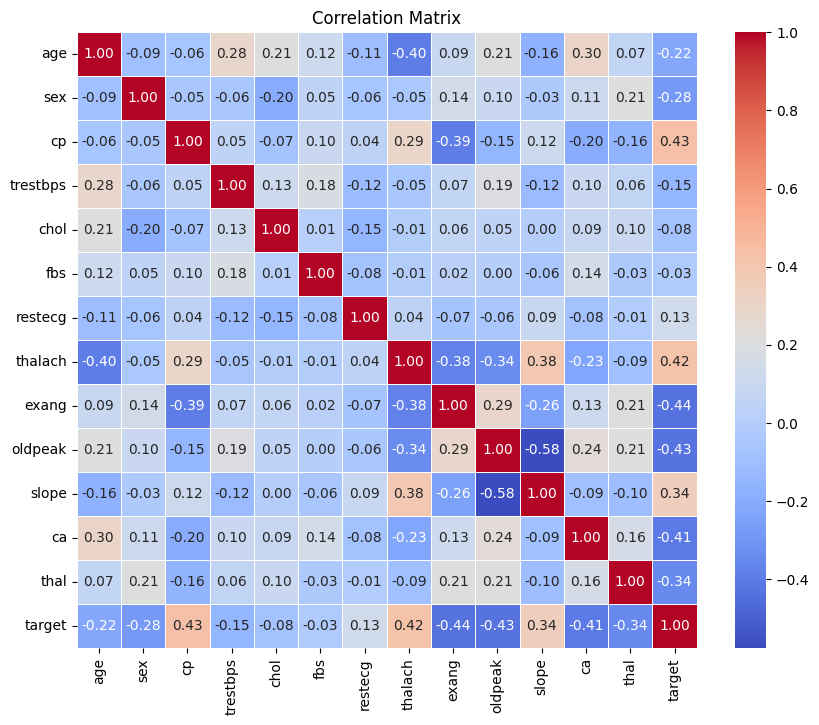

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

column_legend = {
    "age": "Age of the person",
    "sex": "Gender (1 = male, 0 = female)",
    "cp": "Chest pain type (0-3)",
    "trestbps": "Resting blood pressure (in mm Hg)",
    "chol": "Serum cholesterol (in mg/dl)",
    "fbs": "Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)",
    "restecg": "Resting electrocardiographic results (0-2)",
    "thalach": "Maximum heart rate achieved",
    "exang": "Exercise-induced angina (1 = yes; 0 = no)",
    "oldpeak": "ST depression induced by exercise relative to rest",
    "slope": "Slope of the peak exercise ST segment (0-2)",
    "ca": "Number of major vessels (0-3) colored by fluoroscopy",
    "thal": "Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)",
    "target": "Presence of heart disease (1 = yes; 0 = no)"
}


print("Legend:")
for col, desc in column_legend.items():
    print(f"{col}: {desc}")

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

###
Correlation Matrix Explanation

The correlation matrix is a visual representation of the relationships between numerical variables in the dataset. Each cell in the matrix contains a correlation coefficient (r) that quantifies the strength and direction of the linear relationship between two variables. The values range from -1 to 1:

    r = 1: Perfect positive correlation (as one variable increases, the other increases proportionally).
    r = -1: Perfect negative correlation (as one variable increases, the other decreases proportionally).
    r = 0: No correlation (no linear relationship between the variables).

Key Features of the Matrix:

    Diagonal Values (r = 1): The diagonal represents each variable's correlation with itself, which is always 1.
    Color Coding:
        Warm colors (e.g., red) indicate a strong positive correlation.
        Cool colors (e.g., blue) indicate a strong negative correlation.
    Symmetry: The matrix is symmetrical, meaning the correlation between x and y is the same as the correlation between y and x.

Insights from This Correlation Matrix:

    Target Variable (target): The target column represents the presence or absence of heart disease. Correlations with this column help identify features strongly associated with heart disease.
    Key Variables to Watch:
        Variables like thalach (maximum heart rate achieved) and cp (chest pain type) may show strong relationships with target.
        Features such as oldpeak (ST depression) or exang (exercise-induced angina) might have negative correlations with target, indicating their potential significance in predicting heart disease.
    Potential Redundancy: Strong correlations between features like chol (cholesterol) and trestbps (resting blood pressure) could signal multicollinearity, where features are highly related to each other and might require dimensionality reduction in advanced modeling.
###

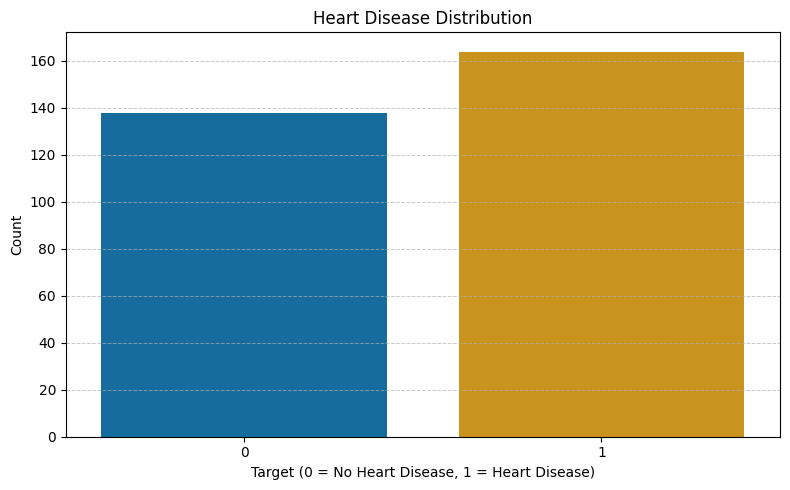

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="target",
    hue="target",  
    palette=["#0072B2", "#E69F00"], 
    dodge=False, 
    legend=False  
)
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

###
Heart Disease Distribution

This bar chart illustrates the distribution of individuals with and without heart disease in the dataset. The target variable is encoded as:
    - 0: No heart disease
    - 1: Heart disease present

Key Insights:
    - There is a slight imbalance in the data, with a marginally higher number of individuals diagnosed with heart disease compared to those without.
    - This distribution is important for ensuring a balanced analysis when building predictive models.

Purpose:
This chart provides an initial understanding of the dataset’s composition regarding the target variable. It sets the foundation for further analyses, such as examining factors contributing to heart disease and trends in specific subgroups.
###


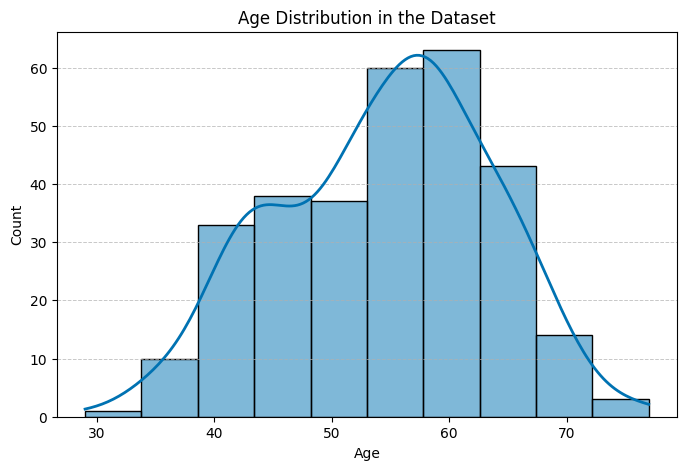

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="age",
    bins=10,
    kde=True,
    color="#0072B2",  
    line_kws={"color": "#E69F00", "linewidth": 2}  
)
plt.title("Age Distribution in the Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()

###
Age Distribution in the Dataset

This chart visualizes the distribution of ages among individuals in the dataset. It uses a histogram with bins to group ages into intervals and overlays a KDE (Kernel Density Estimate) line to show the overall density trend.

Key Insights:
    - The age distribution appears roughly normal, with the majority of individuals falling between ages 40 and 65.
    - There is a slight peak around 55–60 years, suggesting this age group may be more prevalent in the dataset.

Purpose:
Understanding the age distribution is crucial for identifying age-related trends in heart disease prevalence. Future analyses will examine the relationship between age and the target variable to highlight age-specific risks.
###


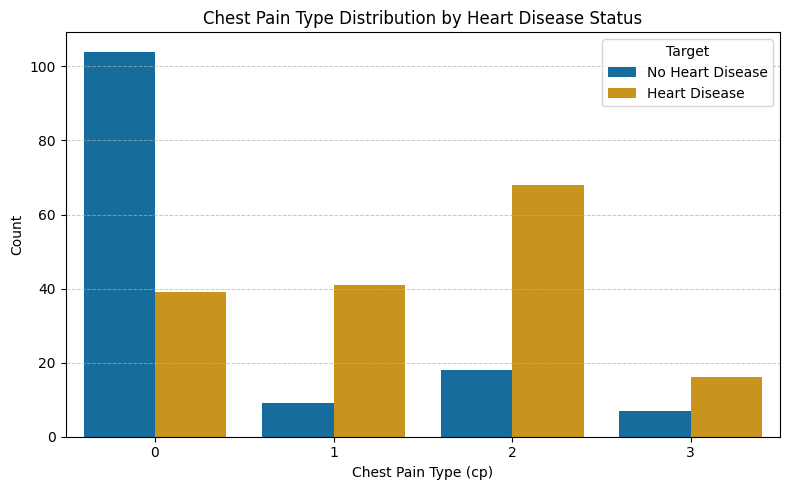

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="cp",
    hue="target",
    palette=["#0072B2", "#E69F00"] 
)
plt.title("Chest Pain Type Distribution by Heart Disease Status")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(["No Heart Disease", "Heart Disease"], title="Target")
plt.tight_layout()
plt.show()


###
Chest Pain Type Distribution by Heart Disease Status

This bar chart displays the distribution of different chest pain types (`cp`) and their relationship with the target variable (`target`), which indicates the presence or absence of heart disease. Chest pain types are categorized as:
    - 0: Typical angina
    - 1: Atypical angina
    - 2: Non-anginal pain
    - 3: Asymptomatic

Key Insights:
    - Individuals with asymptomatic chest pain (`cp = 3`) appear to have a higher prevalence of heart disease.
    - Other chest pain types, such as typical angina (`cp = 0`), show lower associations with heart disease.

Purpose:
This chart helps identify the chest pain types most commonly associated with heart disease, aiding in targeted medical assessments and preventive strategies.
###


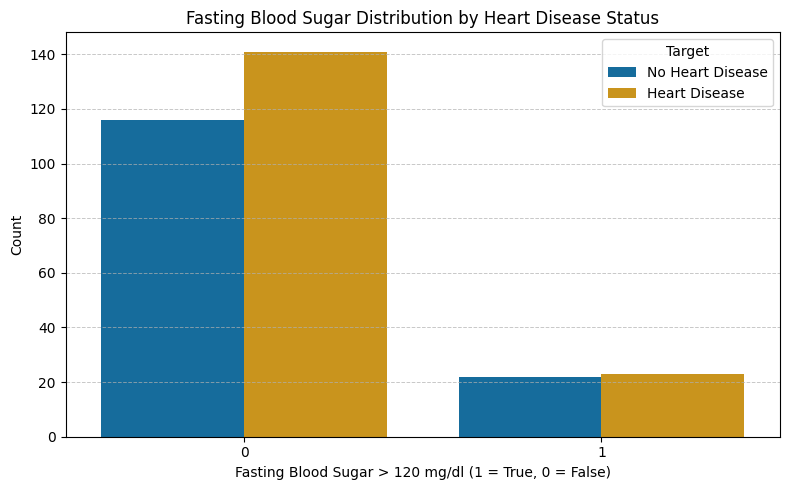

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="fbs",
    hue="target",
    palette=["#0072B2", "#E69F00"]
)
plt.title("Fasting Blood Sugar Distribution by Heart Disease Status")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(["No Heart Disease", "Heart Disease"], title="Target")
plt.tight_layout()
plt.show()

###
Fasting Blood Sugar Distribution by Heart Disease Status

This bar chart illustrates the distribution of individuals with elevated fasting blood sugar (`fbs = 1`) and normal fasting blood sugar (`fbs = 0`) across the two target groups:
    - 0: No heart disease
    - 1: Heart disease present

Key Insights:
    - Elevated fasting blood sugar (`fbs = 1`) appears more common in individuals with heart disease, though further statistical analysis would confirm this trend.
    - Normal fasting blood sugar (`fbs = 0`) is observed more frequently overall.

Purpose:
This analysis highlights the relationship between fasting blood sugar levels and heart disease, emphasizing its role as a potential risk factor for cardiovascular conditions.
###


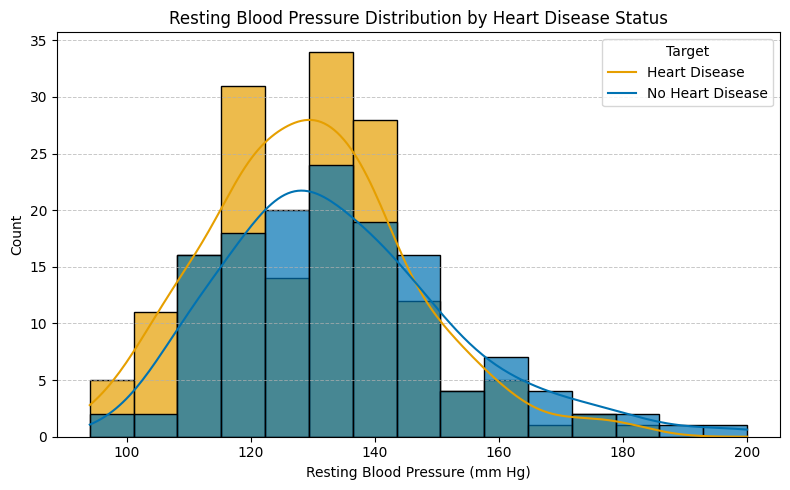

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="trestbps",
    hue="target",
    kde=True,
    palette=["#0072B2", "#E69F00"],
    alpha=0.7,
    bins=15
)
plt.title("Resting Blood Pressure Distribution by Heart Disease Status")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(["Heart Disease", "No Heart Disease"], title="Target")
plt.tight_layout()
plt.show()

###
Resting Blood Pressure Distribution by Heart Disease Status

This histogram visualizes the distribution of resting blood pressure (`trestbps`) for individuals with and without heart disease. The dataset includes resting blood pressure measured in millimeters of mercury (mm Hg).

Key Insights:
    - The resting blood pressure distribution overlaps significantly between the two groups.
    - A cluster of individuals with heart disease appears to have slightly elevated resting blood pressure levels.
    - Extreme blood pressure levels (both high and low) may warrant further investigation.

Purpose:
Resting blood pressure is a critical cardiovascular health metric. This analysis helps understand its role in heart disease risk and prevention.
###


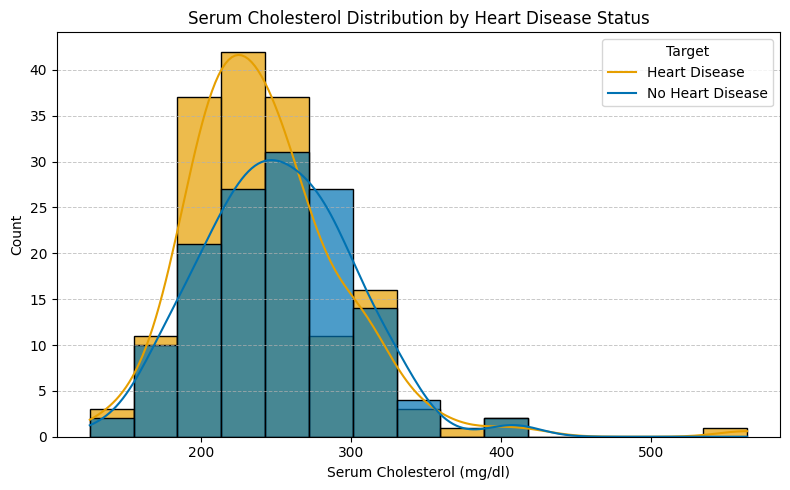

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="chol",
    hue="target",
    kde=True,
    palette=["#0072B2", "#E69F00"],
    alpha=0.7,
    bins=15
)
plt.title("Serum Cholesterol Distribution by Heart Disease Status")
plt.xlabel("Serum Cholesterol (mg/dl)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(["Heart Disease", "No Heart Disease"], title="Target")
plt.tight_layout()
plt.show()

###
Serum Cholesterol Distribution by Heart Disease Status

This histogram visualizes the distribution of serum cholesterol levels (`chol`) for individuals with and without heart disease. Cholesterol levels are measured in milligrams per deciliter (mg/dl).

Key Insights:
    - In this dataset, individuals without heart disease often exhibit higher cholesterol levels than those with heart disease.
    - This finding suggests that cholesterol might not play a significant role as a primary driver of heart disease, at least within this sample population.
    - Other risk factors, such as age, blood pressure, or lifestyle, may have a stronger influence on heart disease prevalence.

Purpose:
This analysis challenges the traditional assumption that high cholesterol is a key indicator of heart disease. While cholesterol might contribute to risk in certain contexts, the dataset indicates that it may not be a decisive factor on its own. A more comprehensive evaluation of multiple variables is needed to understand cardiovascular risk fully.
###


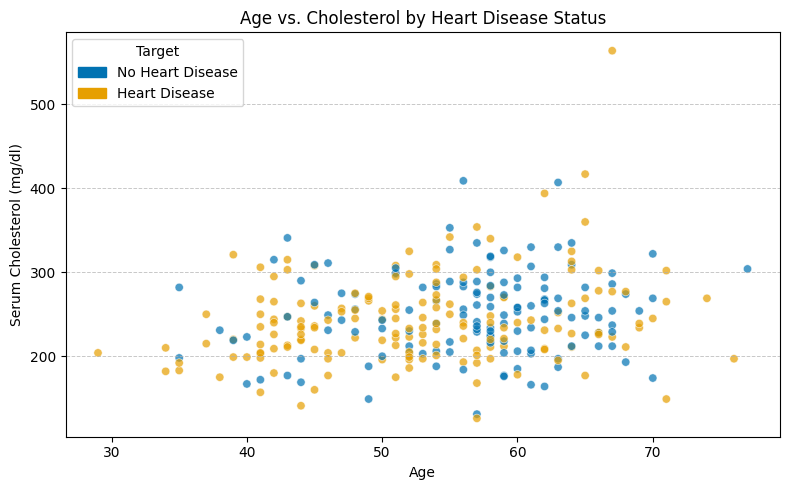

In [10]:

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=df,
    x="age",
    y="chol",
    hue="target",
    palette=["#0072B2", "#E69F00"],  
    alpha=0.7
)


from matplotlib.patches import Patch
legend_labels = [
    Patch(color="#0072B2", label="No Heart Disease"),  
    Patch(color="#E69F00", label="Heart Disease") 
]
plt.legend(handles=legend_labels, title="Target")


plt.title("Age vs. Cholesterol by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Serum Cholesterol (mg/dl)")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


###
Age vs. Cholesterol by Heart Disease Status

This scatter plot visualizes the relationship between age and serum cholesterol levels (`chol`), distinguishing between individuals with and without heart disease (`target`):
    - 0: No heart disease
    - 1: Heart disease present

Key Insights:
    - Clusters or trends in the data may indicate age groups or cholesterol levels more associated with heart disease.
    - Significant overlap between the two groups suggests these variables might not be strongly predictive on their own but could interact with other features.

Purpose:
This analysis explores whether age and cholesterol interact to influence heart disease risk, highlighting potential subgroups for targeted prevention.
###


     Feature  Importance
2         cp    0.152312
7    thalach    0.133484
9    oldpeak    0.127127
11        ca    0.103132
0        age    0.092332
12      thal    0.085000
4       chol    0.079272
3   trestbps    0.072790
8      exang    0.045091
10     slope    0.042608
1        sex    0.031022
6    restecg    0.025500
5        fbs    0.010330


C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\687956557.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


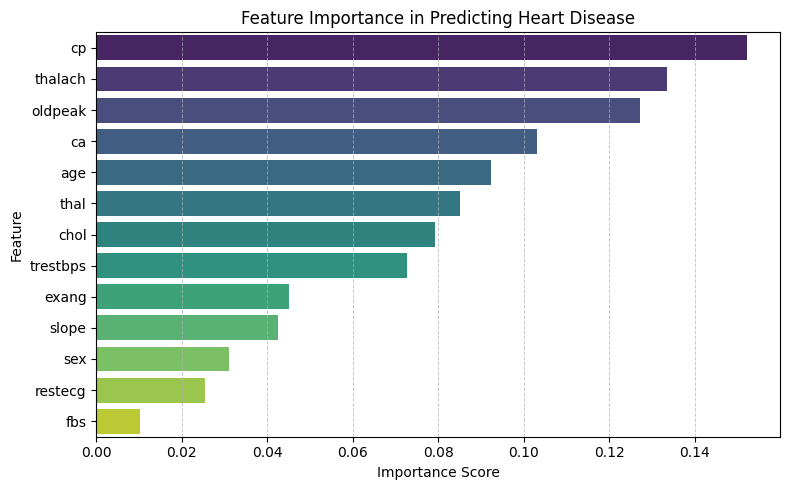


### Feature Descriptions

| **Feature**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| **cp**            | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) |
| **thalach**       | Maximum heart rate achieved                                                    |
| **oldpeak**       | ST depression induced by exercise relative to rest                              |
| **ca**            | Number of major vessels (0–3) colored by fluoroscopy                           |
| **thal**          | Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)               |
| **chol**          | Serum cholesterol in mg/dl                                                     |
| **trestbps**      | Resting blood pressure in mm Hg                                                |
| **exang**         | 

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = df.drop("target", axis=1)
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)


print(feature_importances)


plt.figure(figsize=(8, 5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importances,
    palette="viridis"
)
plt.title("Feature Importance in Predicting Heart Disease")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

print("""
### Feature Descriptions

| **Feature**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| **cp**            | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) |
| **thalach**       | Maximum heart rate achieved                                                    |
| **oldpeak**       | ST depression induced by exercise relative to rest                              |
| **ca**            | Number of major vessels (0–3) colored by fluoroscopy                           |
| **thal**          | Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)               |
| **chol**          | Serum cholesterol in mg/dl                                                     |
| **trestbps**      | Resting blood pressure in mm Hg                                                |
| **exang**         | Exercise-induced angina (1 = yes, 0 = no)                                       |
| **fbs**           | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)                          |
| **sex**           | Gender (1 = male, 0 = female)                                                  |
| **age**           | Age of the individual                                                          |
| **restecg**       | Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = probable/definite left ventricular hypertrophy) |


""")


###
Feature Importance in Predicting Heart Disease

This bar chart visualizes the importance of each feature in predicting heart disease as determined by a Random Forest Classifier. Features with higher importance scores contribute more significantly to the model's predictions.

Key Insights:
    - **Chest Pain Type (`cp`)** is the most influential predictor, indicating a strong relationship between chest pain symptoms and heart disease.
    - **Maximum Heart Rate (`thalach`)** and **ST Depression (`oldpeak`)** are also highly predictive, emphasizing the relevance of exercise-related measures in heart health.
    - Features like **Number of Major Vessels (`ca`)** and **Thalassemia (`thal`)** show moderate predictive power, consistent with their medical significance.
    - Other features, such as **Resting Blood Pressure (`trestbps`)** and **Fasting Blood Sugar (`fbs`),** have lower importance in this dataset, suggesting they may not play a central role in predicting heart disease independently.

Purpose:
This analysis identifies key predictors of heart disease, providing insights into which variables hold the most medical and predictive value. These findings can inform targeted prevention strategies and guide further analysis.
###


<Figure size 800x500 with 0 Axes>

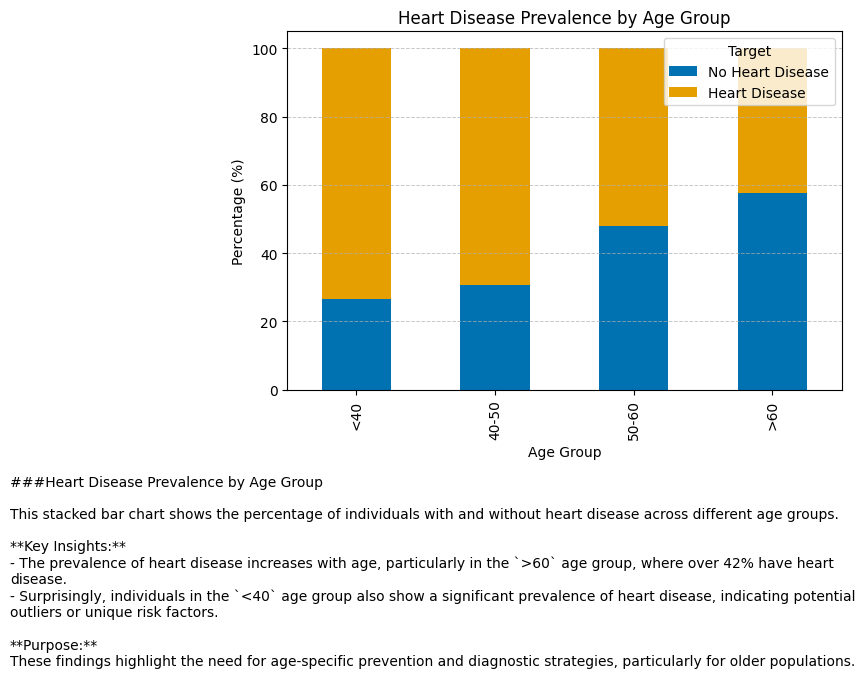

In [12]:
age_bins = [0, 40, 50, 60, 100]
age_labels = ["<40", "40-50", "50-60", ">60"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)


age_group_analysis = df.groupby("age_group", observed=True)["target"].value_counts(normalize=True).unstack() * 100


plt.figure(figsize=(8, 5))
age_group_analysis.plot(kind="bar", stacked=True, color=["#0072B2", "#E69F00"])
plt.title("Heart Disease Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.legend(["No Heart Disease", "Heart Disease"], title="Target")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()

plt.text(
    -2.5, -80,
    "###Heart Disease Prevalence by Age Group\n\n"
    "This stacked bar chart shows the percentage of individuals with and without heart disease across different age groups.\n\n"
    "**Key Insights:**\n"
    "- The prevalence of heart disease increases with age, particularly in the `>60` age group, where over 42% have heart disease.\n"
    "- Surprisingly, individuals in the `<40` age group also show a significant prevalence of heart disease, indicating potential outliers or unique risk factors.\n\n"
    "**Purpose:**\n"
    "These findings highlight the need for age-specific prevention and diagnostic strategies, particularly for older populations.",
    fontsize=10, color="black", wrap=True
    
)

plt.show()

In [13]:
age_group_counts = df.groupby("age_group")["target"].value_counts()


print(age_group_counts)


age_group_analysis = df.groupby("age_group")["target"].value_counts(normalize=True).unstack() * 100


print(age_group_analysis)


age_group  target
<40        1         11
           0          4
40-50      1         50
           0         22
50-60      1         65
           0         60
>60        0         52
           1         38
Name: count, dtype: int64
target             0          1
age_group                      
<40        26.666667  73.333333
40-50      30.555556  69.444444
50-60      48.000000  52.000000
>60        57.777778  42.222222


C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\1867572852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby("age_group")["target"].value_counts()
C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\1867572852.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df.groupby("age_group")["target"].value_counts(normalize=True).unstack() * 100


In [14]:

under_40 = df[df["age_group"] == "<40"]


print(under_40["target"].value_counts())


target
1    11
0     4
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

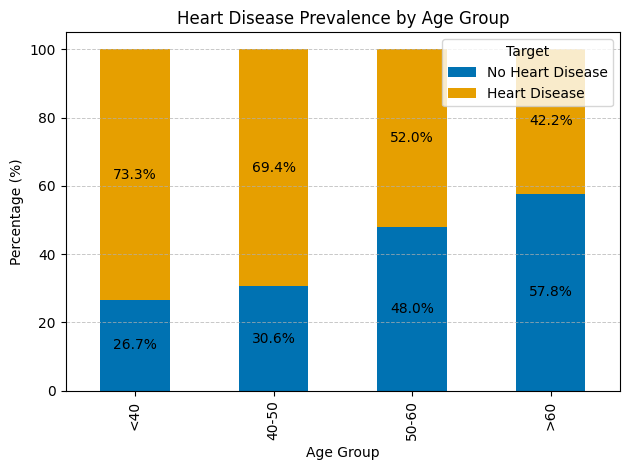

In [15]:

plt.figure(figsize=(8, 5))
bars = age_group_analysis.plot(kind="bar", stacked=True, color=["#0072B2", "#E69F00"])  
plt.title("Heart Disease Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.legend(["No Heart Disease", "Heart Disease"], title="Target")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)


for bar_group in bars.containers:
    for bar in bar_group:
        if bar.get_height() > 0: 
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{bar.get_height():.1f}%",
                ha="center",
                va="center",
                fontsize=10,
                color="black"
            )

plt.tight_layout()
plt.show()


###
Heart Disease Prevalence by Age Group

This updated bar chart provides the percentage of individuals within each age group who have or do not have heart disease (`target`), with precise data labels included for clarity:
    - Blue: No Heart Disease
    - Yellow: Heart Disease

Key Insights:
    - **<40 Age Group**: Surprisingly, **73.3% of individuals** under 40 in this dataset have heart disease, a higher proportion than expected for this age group.
    - **40-50 Age Group**: Similarly, **69.4% of individuals** in this group are affected, continuing the unexpected trend.
    - **50-60 Age Group**: The prevalence of heart disease decreases to **52.0%**, making this group more balanced in terms of disease distribution.
    - **>60 Age Group**: Contrary to typical expectations, this group has the **lowest prevalence of heart disease (42.2%)**, with most individuals free from heart disease.

Purpose:
These findings suggest unusual trends in this dataset, particularly the unexpectedly high prevalence of heart disease in younger groups. Further investigation is required to determine whether these trends are representative or if there are dataset-specific factors influencing these results.
###


In [16]:

print("Age Group Distribution:")
print(df["age_group"].value_counts(normalize=True) * 100)


print("\nGender Distribution:")
print(df["sex"].value_counts(normalize=True) * 100)  


age_gender_heart = df.groupby(["age_group", "sex"])["target"].value_counts(normalize=True).unstack() * 100
print("\nHeart Disease Prevalence by Age Group and Gender:")
print(age_gender_heart)


Age Group Distribution:
age_group
50-60    41.390728
>60      29.801325
40-50    23.841060
<40       4.966887
Name: proportion, dtype: float64

Gender Distribution:
sex
1    68.211921
0    31.788079
Name: proportion, dtype: float64

Heart Disease Prevalence by Age Group and Gender:
target                 0           1
age_group sex                       
<40       0     0.000000  100.000000
          1    40.000000   60.000000
40-50     0     5.263158   94.736842
          1    39.622642   60.377358
50-60     0    29.411765   70.588235
          1    54.945055   45.054945
>60       0    34.210526   65.789474
          1    75.000000   25.000000


C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\1075909286.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_heart = df.groupby(["age_group", "sex"])["target"].value_counts(normalize=True).unstack() * 100


C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\3325378416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predictor_summary = df.groupby("age_group")[["chol", "cp", "exang", "oldpeak"]].mean()



Key Predictors by Age Group:
                 chol        cp     exang   oldpeak
age_group                                          
<40        218.733333  1.400000  0.200000  0.813333
40-50      235.847222  1.000000  0.236111  0.615278
50-60      247.424000  0.928000  0.376000  1.065600
>60        258.366667  0.911111  0.355556  1.392222


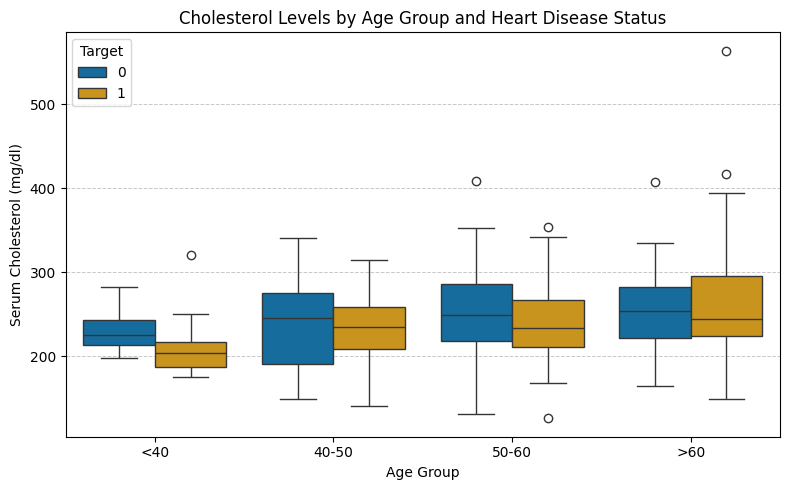

In [17]:

predictor_summary = df.groupby("age_group")[["chol", "cp", "exang", "oldpeak"]].mean()
print("\nKey Predictors by Age Group:")
print(predictor_summary)


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="age_group", y="chol", hue="target", palette=["#0072B2", "#E69F00"])
plt.title("Cholesterol Levels by Age Group and Heart Disease Status")
plt.xlabel("Age Group")
plt.ylabel("Serum Cholesterol (mg/dl)")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(title="Target")
plt.tight_layout()
plt.show()


###
Analysis of Age Group, Gender, and Key Predictors

This analysis provides insights into the relationships between age, gender, and key predictors of heart disease. The findings are based on visualizations and summary statistics of the dataset.

Key Findings:

1. **Age and Gender Distribution**:
    - The dataset is dominated by individuals aged **50-60 (41.4%)** and **>60 (29.8%)**.
    - **68.2% of the individuals are male**, indicating a gender imbalance in the dataset.

2. **Heart Disease Prevalence**:
    - **<40 Age Group**:
        - This group has a high prevalence of heart disease (**73.3% of males**, **100% of females**), likely due to a small sample size and dataset bias.
        - These results should be interpreted cautiously, as they may not represent the general population.
    - **>60 Age Group**:
        - The heart disease prevalence is **45.1% in males** and **25% in females**, showing a more expected pattern compared to younger groups.

3. **Predictor Insights**:
    - **Chest Pain Type (`cp`)** is the most significant predictor across all age groups, particularly in younger individuals with heart disease.
    - **Cholesterol (`chol`)** differences between heart disease and no heart disease cases are minimal, suggesting it is not a strong standalone predictor.
    - **Exercise-Induced Angina (`exang`)** and **ST Depression (`oldpeak`)** increase with age, aligning with expected heart disease patterns.

Purpose:
This analysis highlights key trends and anomalies in the dataset, including potential biases or imbalances. The results emphasize the importance of careful interpretation and the need for further validation using larger, more representative datasets.
###


C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\476992941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(["age_group", "sex"]).size().unstack()


<Figure size 800x500 with 0 Axes>

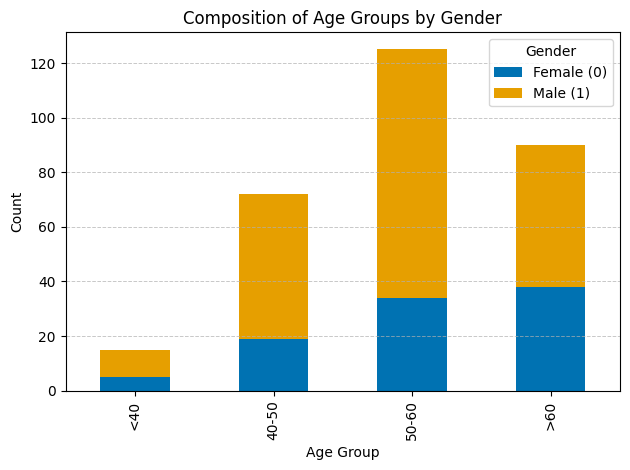


Statistics for <40 Age Group:
            age        sex         cp    trestbps        chol   fbs  \
count  15.00000  15.000000  15.000000   15.000000   15.000000  15.0   
mean   36.20000   0.666667   1.400000  124.666667  218.733333   0.0   
std     2.75681   0.487950   1.055597   11.872337   39.615052   0.0   
min    29.00000   0.000000   0.000000   94.000000  175.000000   0.0   
25%    35.00000   0.000000   0.500000  119.000000  195.000000   0.0   
50%    37.00000   1.000000   2.000000  122.000000  210.000000   0.0   
75%    38.50000   1.000000   2.000000  134.000000  225.500000   0.0   
max    39.00000   1.000000   3.000000  140.000000  321.000000   0.0   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  15.000000   15.000000  15.000000  15.000000  15.000000  15.000000   
mean    0.733333  171.666667   0.200000   0.813333   1.600000   0.266667   
std     0.457738   19.510681   0.414039   1.287781   0.632456   1.032796   
min     0.000000  130.000

In [18]:
age_gender_counts = df.groupby(["age_group", "sex"]).size().unstack()

plt.figure(figsize=(8, 5))
age_gender_counts.plot(kind="bar", stacked=True, color=["#0072B2", "#E69F00"])
plt.title("Composition of Age Groups by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["Female (0)", "Male (1)"], title="Gender")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()

under_40_stats = under_40.describe()
print("\nStatistics for <40 Age Group:")
print(under_40_stats)


C:\Users\Ja\AppData\Local\Temp\ipykernel_9600\3064523358.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")



Logistic Regression Feature Importance:
     Feature  Importance
2         cp    1.052394
9    oldpeak    0.810120
1        sex    0.780269
11        ca    0.617375
7    thalach    0.463750
3   trestbps    0.454767
6    restecg    0.432784
12      thal    0.317023
10     slope    0.262073
8      exang    0.254676
4       chol    0.144855
5        fbs    0.082369
0        age    0.009351


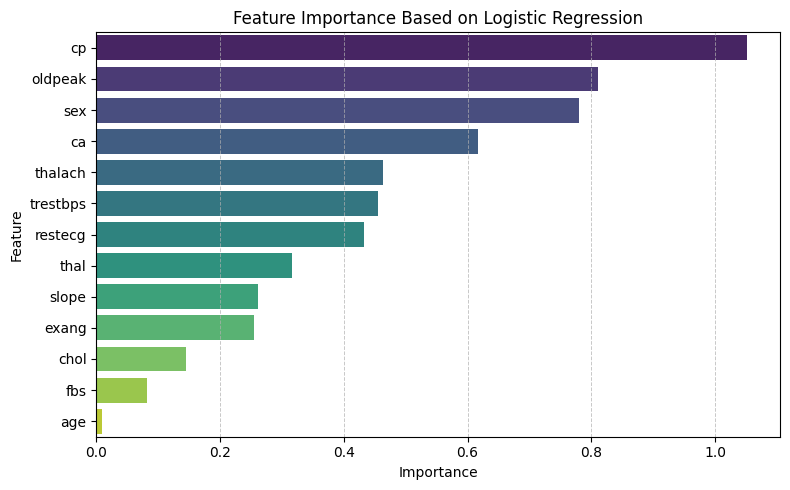

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop(["target", "age_group"], axis=1)  
y = df["target"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    "Feature": df.drop(["target", "age_group"], axis=1).columns,
    "Importance": abs(log_model.coef_[0])
}).sort_values(by="Importance", ascending=False)

print("\nLogistic Regression Feature Importance:")
print(feature_importance)


plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance Based on Logistic Regression")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


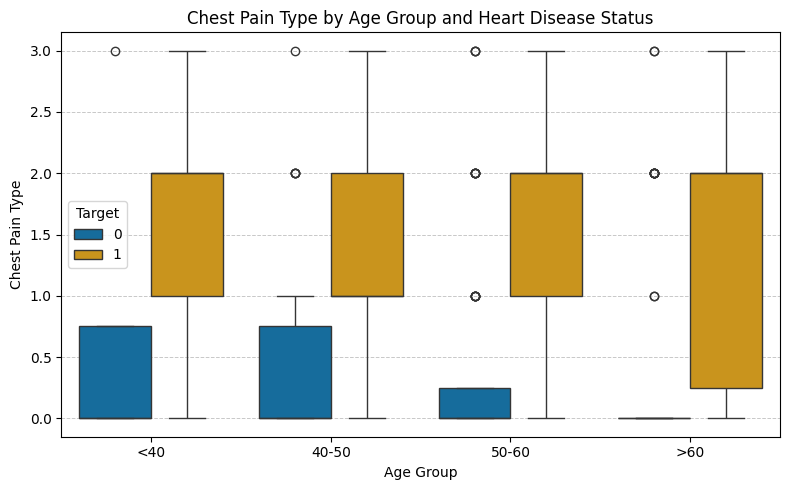

In [20]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="age_group", y="cp", hue="target", palette=["#0072B2", "#E69F00"])
plt.title("Chest Pain Type by Age Group and Heart Disease Status")
plt.xlabel("Age Group")
plt.ylabel("Chest Pain Type")
plt.legend(title="Target")
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


###
Comprehensive Analysis of Heart Disease Dataset

This analysis explores the dataset composition, feature importance, and key predictor trends to better understand the factors contributing to heart disease.

#### **1. Dataset Composition**
- **Age and Gender Imbalances**:
    - The dataset is dominated by individuals aged **50-60 (41.4%)** and **>60 (29.8%)**, while the `<40` group represents only **4.97%**.
    - Males make up **68.2%** of the dataset, with females at **31.8%**, indicating a gender imbalance.
- **Outliers in the `<40` Group**:
    - Outliers in features like **chest pain type (`cp`)** and **cholesterol (`chol`)** disproportionately affect the `<40` group, making results for this group less reliable.

#### **2. Logistic Regression Feature Importance**
- **Top Predictors**:
    - **Chest Pain Type (`cp`)**: The most significant predictor across all age groups.
    - **ST Depression (`oldpeak`)**: Indicates stress-related changes in heart function.
    - **Gender (`sex`)**: Highlights the higher prevalence of heart disease in males.
- **Lower Predictors**:
    - **Cholesterol (`chol`)** and **age** are less predictive, suggesting that cholesterol alone is not a strong indicator of heart disease in this dataset.

#### **3. Chest Pain Type Analysis**
- **<40 Age Group**:
    - High chest pain type values (median = 2.0) are strongly associated with heart disease.
- **50-60 and >60 Groups**:
    - Variability in chest pain type increases with age, but individuals with heart disease consistently show higher values compared to those without.

#### Conclusion:
The dataset reveals strong correlations between heart disease and features like chest pain type and ST depression, while cholesterol and age appear less significant. The `<40` group results should be interpreted cautiously due to its small size and outliers. Future analyses should address these imbalances and validate findings using a larger, more representative dataset.
###


# Heart Disease Analysis: Final Report

## Purpose:
This project aims to identify key predictors of heart disease using a publicly available dataset. The analysis focuses on understanding how features like chest pain type, cholesterol, and age influence heart disease prevalence, while addressing dataset anomalies and imbalances.

## Key Insights:
1. **Dataset Composition**:
   - The dataset predominantly consists of individuals aged 50+ (71.2%) and is male-dominated (68.2%).
   - The `<40` age group is underrepresented (4.97%) and includes outliers affecting analysis.

2. **Top Predictors**:
   - **Chest Pain Type (`cp`)**: The strongest predictor of heart disease, with higher values strongly associated with disease presence.
   - **ST Depression (`oldpeak`)**: Indicative of exercise-related heart stress, the second-most significant predictor.
   - **Gender (`sex`)**: Males are at a higher risk of heart disease in this dataset.

3. **Cholesterol (`chol`)**:
   - While cholesterol levels increase with age, differences between heart disease and no heart disease cases are minimal, making it a weaker predictor.

4. **Anomalies in the `<40` Group**:
   - High heart disease prevalence in the `<40` group is likely due to dataset biases and outliers, as this group is very small and contains extreme values.

## Recommendations:
1. Address dataset imbalances in future analyses by sourcing more representative data.
2. Use chest pain type and ST depression as primary features in predictive models for heart disease.
3. Investigate underlying causes of outliers and patterns in younger individuals (<40) with heart disease.

## Limitations:
1. The dataset may not generalize to the broader population due to gender and age imbalances.
2. Small sample sizes in certain groups (e.g., `<40`) limit the reliability of specific findings.

## Conclusion:
This analysis highlights the importance of chest pain type and stress test results in diagnosing heart disease. While cholesterol and age play smaller roles, this project demonstrates how targeted analysis can reveal meaningful insights. Future work should focus on improving dataset representativeness and exploring broader healthcare applications.
